# HEIG-Vd - Apprentissage supervisé (APV)

## Travail Pratique 02 - Régression logistique

<div class="alert alert-block alert-success">
<b>Informations générales </b>
</div>

**Professeur**: Stephan Robert

**Assistant(s)**: Arthur Babey

**Contact**: stephan.o.robert@gmail.com, arthur.babey@heig-vd.ch ou via Teams

**Rendu**: 

- Date: 15 ocrobre 2024 

- Modalité: Travail individuel. Une fois complétées et toutes les cellules exécutées, renommer le fichier en remplaçant Nom et Prenom par les votres "**TP2_APV_S1-2024_Reponses_Nom_Prenom.ipynb**" puis uploader votre fichier sur Cyberlearn.

- Note: Ce TP est noté sur 6, pour un poids de 12.5%

**Étudiant**:

- Julien Muhlemann

<div class="alert alert-block alert-success">

<b>But du TP </b>
</div>

Le but de ce deuxième TP est d'étudier la régression logistique à une seule variable. 


<!---
<div class="alert alert-block alert-info">
<b>Rappel </b>
</div>
-->

<div class="alert alert-block alert-success">
<b>Table des matières </b>
</div>

1. Régression logistique
>* Visualisation des données
>* Implémentation
>* Loss function et gradient
>* Optimisation des paramètres
>* Evaluation de la régression logistique

2. Régularisation de la fonction logistique
>* Data visualisation
>* Kernel trick
>* Loss function et gradient
>* Seuil de décision

3. Régression polynomiale
>* Visualisation du dataset
>* Régression polynomiale
>* Evaluation de notre modèle
>* Under vs Overfitting


## 1. Régression logistique

Pour ce premier exercice, nous allons construire une régression logistique afin de déterminer si un étudiant doit être accepté dans une université ou non. Pour décider de cela, nous avons à notre disposition les résultats de chaque étudiant à deux examens. Nous possédons également, des données historiques des étudiants des autres années. Plus précisément, nous connaissons leur score à ce même examens ainsi que la décision d'admissions. Ces informations sont contenues dans un dataset. 

Nous allons donc construire un classificateur qui estime la probabilité d'admission, basé sur le score aux deux examens.

### 1.1 Visualisation des données

Comme d'habitude, nous allons commencer par essayer de comprendre un minimum les données avec lesquelles nous allons travailler. Pour faire cela, nous allons donc commencer par visualiser ces données.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc, cm
from scipy import optimize

In [2]:
with open('ex2data1.txt') as f1:
    dataset_1 = np.loadtxt(f1, delimiter = ',',dtype = 'float', usecols = None)

X = dataset_1[:, :-1]
Y = dataset_1[:, 2]
KO = np.where(Y == 0)[0]
OK = np.where(Y)[0]

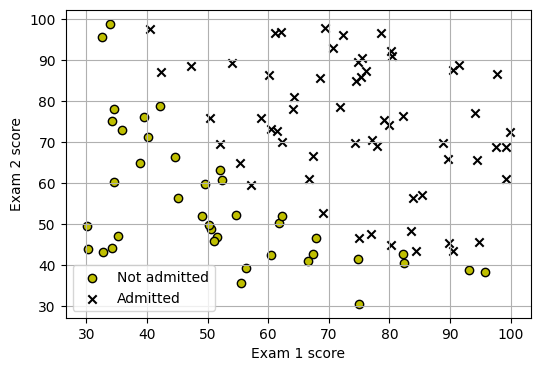

In [3]:
# TODO: plot the data

plt.figure(figsize=(6, 4))
plt.scatter(X[KO, 0], X[KO, 1], c='y', edgecolor='black', marker='o', label='Not admitted')
plt.scatter(X[OK, 0], X[OK, 1], c='black', marker='x', label='Admitted')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid(True)
plt.show()

## 1.2 Implémentation

Avant de commencer, rappelons que la regression logistique est définie par
$$
h(\Theta) = g(\Theta^{t}x) = \frac{1}{1 + e^{-\Theta^{t}x}}
$$
où $g$ est la sigmoid
$$
g(z) := \frac{1}{1 + e^{-z}}
$$

Nous allons maintenant implémenter ces fonctions, ce qui va être utile pour le reste du TP.

In [4]:
import math
def sigmoid(z):
    # TODO: implement this function
    return 1 / ( 1 + math.exp(-z))

In [5]:
def h_fct(theta, x):
    # TODO: implement this function
    z = np.dot(x, theta)
    return sigmoid(z)

In [6]:
# testing the sigmoid function
sigmoid(-100)

3.7200759760208356e-44

## 1.3 Loss function et gradient

Nous allons maintenant implémenter la loss fonction, rappelons que cette dernière est
$$
J(\Theta) = -\frac{1}{m} \left( \sum_{i=0}^{m}y_{i}\log(h(x_{i})) + (1 - y_{i})\log(1 - h(x_{i}))     \right)
$$
Et le gradient de cette fonction est un vecteur de même longueur que $\Theta$ avec
$$
\frac{\partial J(\Theta)}{\partial \theta_{0}} = \frac{1}{m} \sum_{i=1}^{m}(h(x_{i}) - y_{i})
$$
et pour $j>0$, on obtient.
$$
\frac{\partial J(\Theta)}{\partial \theta_{j}} = \frac{1}{m} \sum_{i=1}^{m}(h(x_{i}) - y_{i})(x_{i})_{j}
$$
Remarquez que le gradient ressemble beaucoup au gradient de la régression linéaire.

In [7]:
def lossFunction (theta, x, y):
    # TODO: implement this function

    totam_sum = 0
    m = len(x)
    
    for i in range(m):
        h = h_fct(theta, x[i])
        h = np.clip(h, 1e-15, 1 - 1e-15) # évite les log(0) 

        totam_sum += -1 * (y[i] * np.log(h) + (1 - y[i]) * np.log(1 - h))
    totam_sum /= m
    return totam_sum

lossFunction(np.array([0,0]), X, Y)

0.6931471805599458

## 1.4 Optimisation des paramètres

Dans le TP précédent, nous avons trouvé les paramètres optimaux de la régression linéaire en utilisant notre propre implémentation de la descente du gradient. 


En pratique, il est plus commun d'utiliser des packages spécialement conçu pour ce genre de problème. Dans ce TP, nous allons utiliser $\texttt{scipy.optimize.minimize}$ pour déterminer $\Theta$. 
Si la fonction coût a été correctement implémentée $\texttt{scipy.optimize.minimize}$ va converger vers les paramètres optimaux $\Theta$.

In [8]:

X = np.c_[np.ones(X.shape[0]), X] # ajouter une colonne de '1'
# Each data point (x_{1}, x_{2}) should become (1, x_{1}, x_{2})


In [9]:
# TODO: add a '1' to the first component of each data x
from scipy.optimize import minimize

# initial theta values
theta = np.zeros(X.shape[1])
# apply optimization

result = minimize(lossFunction, theta, args=(X, Y))
theta = result.x
# TODO: compute the optimal parameter

On peut maintenant utiliser ce paramètres $\Theta$ pour tracer un seuil de jugement sur le training dataset.

In [10]:
theta

array([-25.16119461,   0.20623055,   0.2014705 ])

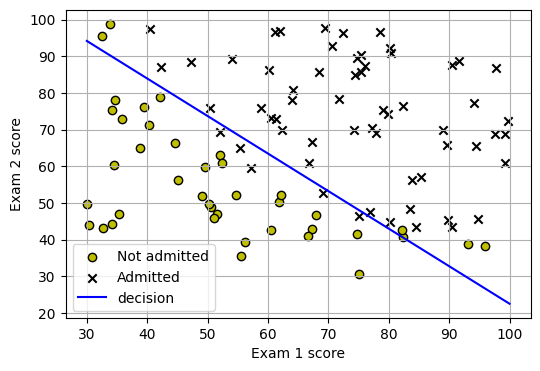

In [11]:
# TODO: plot the data and the decision boundary
plt.figure(figsize=(6, 4))
plt.scatter(X[KO, 1], X[KO, 2], c='y', edgecolor='black', marker='o', label='Not admitted')
plt.scatter(X[OK, 1], X[OK, 2], c='black', marker='x', label='Admitted')

x1 = np.linspace(30, 100, 100) # générer 100 valeurrs de 30 à 100
x2 = -(theta[0] + theta[1] * x1) / theta[2] # sous la forme mx+b depuis: theta0 + x1*theta1 + x2*theta2
plt.plot(x1, x2, label='decision', color='b')
                 
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.grid(True)
plt.show()


### 1.5 Evaluation de la régression logisitique

Maintenant que nous connaissons les paramètres optimaux de notre régression logistique, il est possible de l'utiliser afin de décider si un étudiant doit être accepté ou pas. Pour un étudiant avec un score de $45$ à l'examen $1$ et $85$ à l'examen $2$. Nous devrions trouver un score d'environ $0.7763$.

In [12]:
# TODO compute the score of a student who has a score of 45 at the first test and 85 at the second.
etudiant = np.array([1, 45, 85])
h_fct(theta, etudiant)

0.7762894564488538

## 2. Régularisation de la fonction logistique

###  2.1 Data visualisation

Pour cet exercice, nous allons utiliser un nouveau dataset. Ce dataset, que vous pouvez trouver dans $\texttt{ex2data2.txt}$, contient le score de puces éléctroniques à deux différents tests ainsi que si la puce a été jugée conforme à certains critères de qualité ou pas. Plus précisément, $y$ vaut un si la puce a été jugée conforme aux critères de qualités et $y=0$ sinon. Comme avant, commençons par visualiser notre dataset.

In [13]:
with open('ex2data2.txt') as f2:
    dataset_2 = np.loadtxt(f2, delimiter = ',',dtype = 'float', usecols = None)
    
X = dataset_2[:, :-1]
Y = dataset_2[:, 2]
KO = np.where(Y == 0)[0]
OK = np.where(Y)[0]

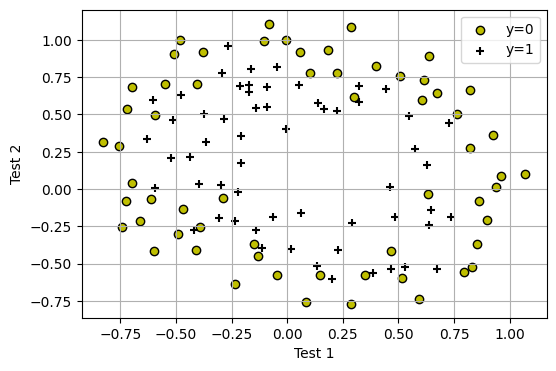

In [14]:
# TODO: plot the data
plt.figure(figsize=(6, 4))
plt.scatter(X[KO, 0], X[KO, 1], c='y', edgecolor='black', marker='o', label='y=0')
plt.scatter(X[OK, 0], X[OK, 1], c='black', marker='+', label='y=1')

plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.grid(True)
plt.show()

Remarquer qu'on ne peut pas ne pas séparer les $y=1$ et les $y=0$ par une fonction linéaire. Par conséquent, une application directe de la régression logistique fournira de mauvais résultats sur ce dataset.

### 2.2 Kernel trick

Une manière de contourner cette limitation est de plonger nos données initial dans un espace de plus grande dimension où il sera possible de séparer nos points linéairement. C'est ce que nous appelons le 'kernel trick' (astuce du noyau).

Pour faire cela, nous allons utiliser une fonction 'mapFeature' défini par
$$
(x_{1}, x_{2}) \mapsto \left(
\begin{array}{c}
1 \\
x_1 \\
x_2\\
x_1^2\\
x_1x_2\\
x_2^2\\
x_1^3\\
\vdots \\
x_1x_2^5\\
x_2^6
\end{array} 
\right)
$$
plus précisément l'image de $(x_{1}, x_{2})$ est composé des monômes de la forme $x_{1}^{i-j}x_{2}^{j}$ avec $i$ allant de $0$ à $6$ et $j$ allant de $0$ à $i$.

In [15]:
def mapFeature(x1, x2):
    # TODO: implement this function

    degree = 6
    out = []
    for i in range(degree + 1):
        for j in range(i + 1):
            out.append((x1 ** (i - j)) * (x2 ** j))
    
    return np.column_stack(out)

Cette fonction va nous permettre de plonger notre dataset de dimension $2$ dans un espace de dimension $28$. Ensuite, nous allons appliquer une régression logistique linéaire dans cette espace, ce qui nous permettra de construire un seuil de décisions qui semblera plus complexe lorsque nour le projeterons dans notre espace inital à deux dimensions. 

In [16]:
map_X = mapFeature(X[:, 0], X[:, 1])

### 2.3 Loss function et gradient

Cette approche nous permet de construire des modèles plus performants. Mais cela est également plus susceptible de mener à de l'overffiting. Pour éviter cela, nous allons régulariser notre loss fonction. Plus précisément, la loss fonction devient
$$
J(\Theta) = -\frac{1}{m} \left( \sum_{i=0}^{m}y_{i}\log(h(x)_{i}) + (1 - y_{i})\log(1 - h(x)_{i}) \right)
 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^{2}   
$$
Noter que la deuxième somme commence seulement à l'indice $1$. Ce qui implique que nous ne régularisons pas sur le terme $\theta_{0}$. En particulier, les dérivées partielles deviennent
$$
\frac{\partial J(\mathbf{\Theta})}{\partial\theta_0}=\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)(x_i)_{0} 
$$
pour $j=0$ et pour $j > 1$, 
$$
\frac{\partial J(\mathbf{\Theta})}{\partial \theta_j}=\left[\frac{1}{m}\sum_{i=1}^{m}\left(h(\mathbf{x}_i)-y_i\right)(x_i)_j{+\frac{\lambda}{m}\theta_j}\right]
$$

In [17]:
def lossFunctionReg (theta, x, y, lamb):
    # TODO: implement this function
    m = len(y)
    total_sum = 0
    
    for i in range(m):
        h = h_fct(theta, x[i])
        h = np.clip(h, 1e-15, 1 - 1e-15)  # Évite les log(0)
        
        total_sum += - (y[i] * np.log(h) + (1 - y[i]) * np.log(1 - h))

    # Calculer la perte moyenne
    total_sum /= m
    # régularisation
    reg_term = (lamb / (2 * m)) * np.sum(theta[1:] ** 2)
    
    return total_sum + reg_term

### 2.5 Seuil de décision

Comme pour l'exercice 1, nous allons maintenant utiliser $\texttt{scipy.optimize.minimize}$ afin de déterminier les paramètres optimaux.

In [18]:
map_X.shape

(118, 28)

In [19]:
theta = np.zeros(28)
lamb = 0.5
# TODO: compute the optimal parameters
result = minimize(lossFunctionReg, theta, args=(map_X, Y, lamb))
theta = result.x


Nous allons maintenant tracer le seuil de décision dans l'espace initial à deux dimensions. Pour faire cela, nous pouvons calculer les valeurs sur une grille (après l'avoir plongé dans l'espace à $28$ dimensions) et tracer les valeurs pour lesquelles les prédictions changent de $y=0$ à $y=1$.

C:\Users\Julien\AppData\Local\Temp\ipykernel_7940\19680996.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i, j] = np.dot(mapped_features, theta)  # faire le calcul avec theta optimal


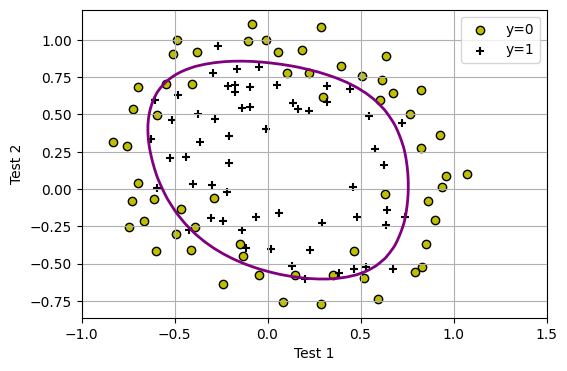

In [20]:
# TODO: plot the decision boundary using the optimal parameters
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-0.75, 1., 50)

z = np.zeros((len(u), len(v)))
# z = theta.T * mapFeature(u, v) pour chaque paire (u, v)
for i in range(len(u)):
    for j in range(len(v)):
        mapped_features = mapFeature(u[i], v[j])  #projeter u, v en 18 dimensions
        z[i, j] = np.dot(mapped_features, theta)  # faire le calcul avec theta optimal


z = z.T

plt.figure(figsize=(6, 4))
plt.scatter(X[KO, 0], X[KO, 1], c='y', edgecolor='black', marker='o', label='y=0')
plt.scatter(X[OK, 0], X[OK, 1], c='black', marker='+', label='y=1')
plt.contour(u, v, z, levels=[0], linewidths=2, colors='purple')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.grid(True)
plt.show()

Répéter maintenant la procédure ci-dessus en changeant la valeur de $\lambda$. Que pouvez-vous observer?


## 3. Régression polynomiale

Dans cette exercice, nous allons construire une régression polynomiale et étudier l'erreur de notre modèle sur le training et le validation dataset en fonction du degré de notre polynôme.

### 3.1 Visualisation du dataset

Comme d'habitude, nous allons commencer par visualiser nos datasets. Plus précisément, nous avons à dispositions deux différents datasets. 
1. Un dataset d'entrainement appelé training dataset, que nous allons utiliser pour entraîner notre modèle, qu'on peut trouver dans le fichier $\text{ex3_training.txt}$.
2. Un dataset d'évaluation appelé validation dataset, que nous allons utiliser pour évaluer notre modèle et déterminer nos hyperparamètre (le degré du polynôme d'interpolation dans notre cas) et qu'on peut trouver dans le fichier $\text{ex3_validation.txt}$.



In [40]:
with open('ex3_training.txt') as f2:
    train_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)

X_train = train_data[0]
Y_train = train_data[1]


with open('ex3_validation.txt') as f2:
    eval_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)
X_eval =eval_data[0]
Y_eval =eval_data[1]

Pour commencer, nous pouvons déjà faire un plot de ces deux datasets.

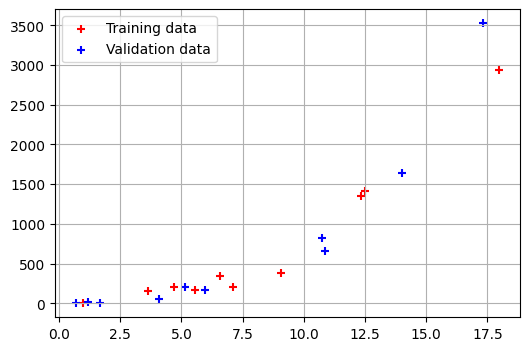

In [41]:
# TODO: plot this data
plt.figure(figsize=(6, 4))
plt.scatter(train_data[0], train_data[1], c='red', marker='+', label='Training data')
plt.scatter(eval_data[0], eval_data[1], c='blue', marker='+', label='Validation data')

plt.legend()
plt.grid(True)
plt.show()

La couleur des points n'est évidemment pas importante, mais veuillez s'il vous plaît être cohérent sur l'ensemble de cet exercice. Gardez la même couleur pour le jeu de données d'entraînement et le jeu de données de validation tout au long de l'exercice.

### 3.2 Régression polynomiale

Nous allons maintenant utiliser nos données d'entraînement pour faire une régression polynomiale

In [93]:
def fit_data(degree, X_train, Y_train, show=False):
    """
    degree: degree of the polynome used for the interpolation
    X_train, Y_train:  training data
    show: if set to true, this function plot the graph of the interpolation
    """
    # TODO: implement this function
    coeffs = np.polyfit(X_train, Y_train, degree)
    poly_func = np.poly1d(coeffs)

    Y_train_pred = poly_func(X_train)
    #renvoyer aussi le mse d'entrainement puisque on attend 2 valeurs de retour
    mse_train = np.mean((Y_train - Y_train_pred) ** 2)
    
    if show:
        plt.scatter(X_train, Y_train, color='red', marker='+', label='X_train')
        x_range = np.linspace(0,20, 100)
        y_poly = poly_func(x_range)

        plt.plot(x_range, y_poly, color='blue', label='Régression')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return coeffs, mse_train

On peut ensuite construire notre fonction 'fit_data' pour déterminer notre regression polynomiale ainsi que faire le plot de cette régression.

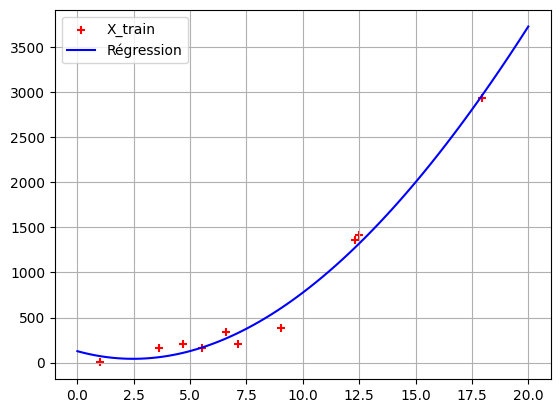

In [94]:
with open('ex3_training.txt') as f2:
    train_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)

X_train = train_data[0]
Y_train = train_data[1]

coeff, _ = fit_data(3, X_train, Y_train, True)

### 3.3 Evaluation de notre modèle

Nous allons maintenant construire une fonction qui nous permettra d'évaluer notre modèle.

In [99]:
def evaluate_model(parameters, X_eval, Y_eval, show=False):
    """
    Given the parameters of our model (which is expected to be a polynome), 
    we compute and return the MSE errors of its predictions on X_eval. 
    If show is set to true, we plot a graph of these predictions
    """
    # TODO: implement this function
    poly_func = np.poly1d(parameters)
    Y_pred = poly_func(X_eval)    
    mse = np.mean((Y_eval - Y_pred) ** 2)
    
    if show:
        plt.scatter(X_eval, Y_eval, color='red', marker='+', label='Y_val')

        x_range = np.linspace(0,20, 100)
        y_range = poly_func(x_range)
        
        plt.plot(x_range, y_range, color='blue', label='Régression')

        plt.xlabel('Changement du niveau d''eau')
        plt.ylabel('Ecoulement')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return mse


En utilisant, ces deux dernières fonctions, on peut alors calculer les paramètres optimaux de notre d'une régression de degré 2 et tracer notre régression sur le training et la validation dataset.

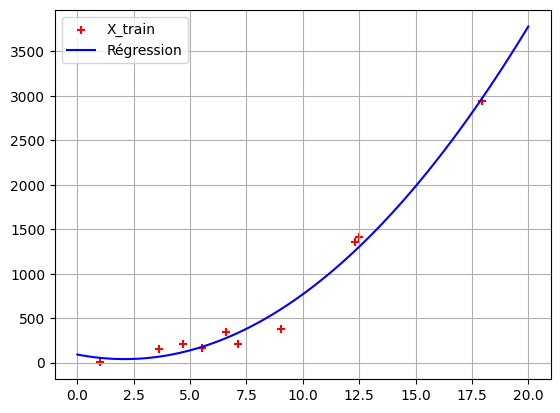

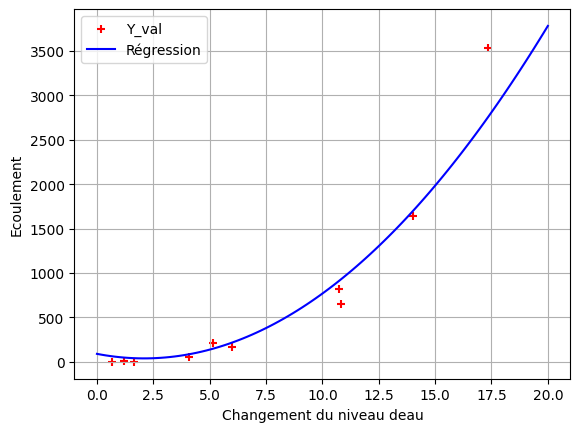

In [100]:
with open('ex3_training.txt') as f2:
    train_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)

X_train = train_data[0]
Y_train = train_data[1]

parameters,_= fit_data(2, X_train, Y_train, True)

with open('ex3_validation.txt') as f2:
    eval_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)
X_eval =eval_data[0]
Y_eval =eval_data[1]

_ = evaluate_model(parameters, X_eval, Y_eval, show=True)

### 3.4 Under vs Overfitting

Nous allons maintenant utiliser les deux fonctions construites en $3.2$ et $3.3$ pour évaluer nos modèles en fonction du degré du polynôme d'interpolation. Pour commencer, nous allons déjà implémenter une fonction qui va construire le polynôme d'interpolation et calculer son erreur sur le training et le validation dataset pour des degrés variant entre deg_min et deg_max. Cette fonction, va retourner ces erreurs sous forme de deux vecteurs de dimensions (deg_max - deg_min).

In [ ]:
def compute_error(deg_min, deg_max, X_train, Y_train, X_val, Y_val):
    """
    This function build the polynomial interpolation, using (X_train and Y_train) datasets and evaluate it on (X_val, Y_val)
    and compute the train and validation errors.
    It builds a such interpolation for all degree between deg_min and deg_max. All training and validation errors are stored and 
    returned.
    """
    # TODO: implement this function
        

En utilisant cette fonction, on peut alors tracer la validation et training erreur en fonction du degré du polynôme d'interpolation.

In [ ]:
with open('ex3_training.txt') as f2:
    train_data = np.loadtxt(f2, delimiter = ' ',dtype = 'float', usecols = None)

X_train = train_data[0]
Y_train = train_data[1]
min_degree = 0
max_degree = 9

# TODO: plot the validation and train error according to the degree of our poylnomial regression

Comme on peut le voir ci-dessus, lorsque notre modèle est de degré petit, l'erreur sur le training et le validation dataset est grand. Dans ce cas, nous sommes en présence d'underfitting. Notre modèle n'est pas assez complexe pour s'adapter à la complexité des données avec lesquelles nous travaillons.


Lorsque notre polynôme est degré grand, l'erreur sur notre training dataset est très petite mais celle sur le validation dataset explose. Nous sommes en présence d'overfitting. Notre modèle est trop complexe pour nos données. Il apprend des caractéristiques non-pertinentes des données comme du bruit.